In [1]:
%pylab inline
import mentari_default as mtr
import h5py
import os

Populating the interactive namespace from numpy and matplotlib


### Example on reading output file from mentari

In [7]:
dirname = 'output_app/'
filename = 'mag_v2_'
#z_list = [0.564, 0.755]
z_list = [0.02]
ext = '.hdf5'
firstfile = 0
lastfile = 0 

#This example is to read over files on one redshift only, you can loop over z_list if necessary
z = z_list[0] #read files on redshift = 0.564
mass = []
m_app = []
m_abs = []
filter_list = ['WISE_W1']

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(z) + '_' + str(i) + ext

    with h5py.File(file, 'r') as f:
        stellarmass = f['stellarmass']
        m1 = f['apparent']
        m2 = f['absolut']
        for j in range(len(filter_list)):
            mass.extend(stellarmass)
            m_app.extend(m1[j])
            m_abs.extend(m2[j])

### Plotting stellar mass function and luminosity function

In [8]:
Hubble_h=0.73
#BoxSize = ((500**3) * 3/512)**(1/3) #32 files ~ 200Mpc
BoxSize = ((62.5**3) * 2/32)**(1/3)
volume = (BoxSize/Hubble_h)**3

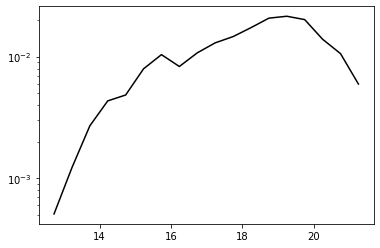

In [9]:
#Luminosity function using apparent magnitude at z=0.5
mi = min(m_app)
ma = 21.5
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_app, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

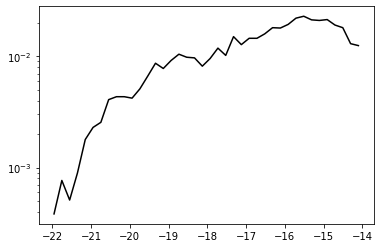

In [10]:
#Luminosity function using apparent magnitude at z=0.5
mi = min(m_abs)
ma = -14
binwidth = 0.2
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_abs, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

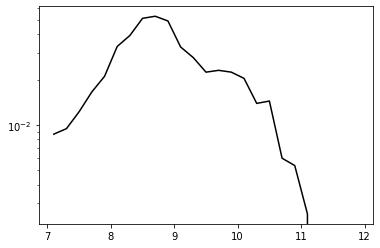

In [11]:
mi = 7
ma = 12
binwidth = 0.2
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(np.log10(mass), range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

In [12]:
file_input = 'output_app/mentari_output_z0.509-0.hdf5'
print(file_input)
with h5py.File(file_input, 'r') as f:
    mass = list(f['StellarMass'])
    wavelength_m1 = np.array(f['Wavelength_m1'])
    spectra_m1 = np.array(f['Spectra_m1'])
    wavelength_s = np.array(f['Wavelength_stellar'])
    spectra_s = np.array(f['Spectra_stellar'])

output_app/mentari_output_z0.509-0.hdf5


In [33]:
z = 0.509
mab_app = mtr.compute_mab(wavelength_m1, spectra_m1, filter_list, z)

In [156]:
wavelength, spectrum = mtr.doppler_shift(wavelength_m1, spectra_m1, z)
#print(wavelength, spectrum[0])
F = mtr.read_filters()
filters_wave = eval('F.WISE_W1_wave')
filters = eval('F.WISE_W1')
if filters[0] != 0:
    filters[0] = 0
if filters[-1] != 0:
    filters[-1] = 0
filt_int  = np.interp(wavelength, filters_wave, filters)
filtSpec = filt_int * spectrum
flux = simps(filtSpec, sort(wavelength))
print(flux)

[nan nan nan ... nan nan nan]


In [155]:
wavelength, spectrum = mtr.doppler_shift(wavelength_m1, spectra_m1, 0.508)
F = mtr.read_filters()
filters_wave = eval('F.WISE_W1_wave')
filters = eval('F.WISE_W1')
if filters[0] != 0:
    filters[0] = 0
if filters[-1] != 0:
    filters[-1] = 0
filt_int  = np.interp(wavelength, filters_wave, filters)
w = np.where(filt_int > 0)[0]
filtSpec = filt_int[w] * spectrum[:,w]
#print(filtSpec[0])
print(wavelength)
flux = simps(filtSpec, wavelength)
print(flux)

[1.37228000e+02 1.41752000e+02 1.44768000e+02 ... 8.44924408e+06
 1.00572240e+07 1.21616938e+07]


ValueError: If given, length of x along axis must be the same as y.

/var/folders/yy/5nly74gn5m381bhx3tk4z3580000gs/T/ipykernel_3001/728257629.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(wavelength, np.log10(spectrum[0]))


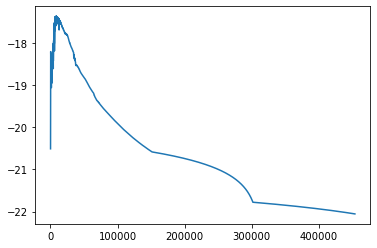

In [149]:
wavelength, spectrum = mtr.doppler_shift(wavelength_m1, spectra_m1, z)
plt.plot(wavelength, np.log10(spectrum[0]))

/var/folders/yy/5nly74gn5m381bhx3tk4z3580000gs/T/ipykernel_3001/2838709593.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(wavelength, np.log10(spectrum[0]))


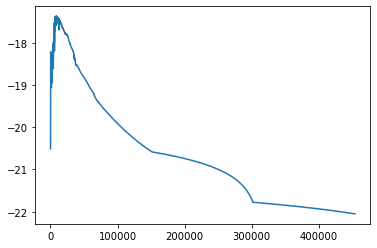

In [150]:
wavelength, spectrum = mtr.doppler_shift(wavelength_m1, spectra_m1, 0.508)
plt.plot(wavelength, np.log10(spectrum[0]))